<a href="https://colab.research.google.com/github/MohamedMkaouar/DataCamp_project/blob/main/MKAOUAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WORK

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 8.8MB/s 
     |████████████████████████████████| 14.8MB 316kB/s 
     |████████████████████████████████| 6.5MB 23.7MB/s 


In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas 
from scipy import interpolate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_excel('https://query.data.world/s/yg4pp7vm5dhoj6pj4xjm43gcg73ujq',header=3)
df.drop(columns=['Timestamp','PostalCode', 'Counter', 'CompanyEmployeesOverall', 'PopulationOfLargestCityWithin20Miles'], inplace=True)
df['SalaryUSD'] = list(map(float, [str(ch).replace(" ", "").replace(",", ".") for ch in list(df.SalaryUSD)]))
df = df[df["SalaryUSD"] != min(df["SalaryUSD"])] # we drop the ones who have 0 as salary


# MKAOUAR

## "Education" feature

In [4]:
Counter(df.Education)

Counter({'Associates (2 years)': 764,
         'Bachelors (4 years)': 3658,
         'Doctorate/PhD': 51,
         'Masters': 1236,
         'None (no degree completed)': 1182})

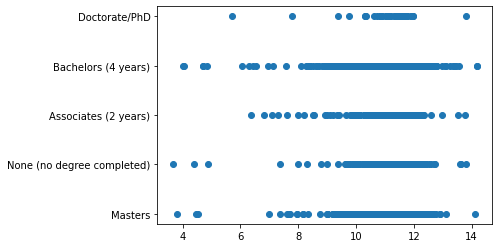

In [5]:
plt.plot(np.log(df["SalaryUSD"]),df["Education"],"o")
plt.show()

What we see above is intuitively  logical because the more we study the higher our salary.

In [6]:
mean_salary_by_education = df[['SalaryUSD','Education']].groupby(['Education']).mean().sort_values(by = 'SalaryUSD',ascending = False)
print(mean_salary_by_education)

                                SalaryUSD
Education                                
Doctorate/PhD               101951.568627
Bachelors (4 years)          94134.569672
Masters                      93649.316817
None (no degree completed)   90774.013212
Associates (2 years)         87723.073233


## "Certifications" Feature

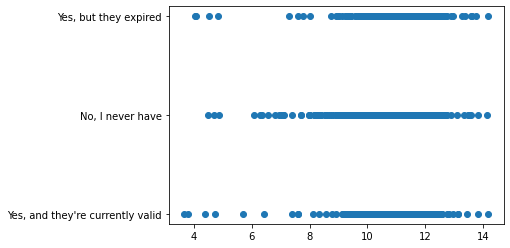

                                      SalaryUSD
Certifications                                 
Yes, but they expired             101880.610226
Yes, and they're currently valid   90976.210966
No, I never have                   89159.311806


In [7]:
Counter(df.Certifications)
plt.plot(np.log(df["SalaryUSD"]),df["Certifications"],"o")
plt.show()
mean_salary_by_certifications = df[['SalaryUSD','Certifications']].groupby(['Certifications']).mean().sort_values(by = 'SalaryUSD',ascending = False)
print(mean_salary_by_certifications)

 We see Here that having a certification affects the salary. Nevertheless, it is not important if they expired or not which is kind of logical because from a company's point of view. In other words, expiration date of a certificate do not matter, what matters is that the skill is learned by the employee.

## "Education is computer related" feature

In [8]:
Counter(df.EducationIsComputerRelated)

Counter({'No': 1898, 'Yes': 3779, nan: 1214})

In [9]:
mean_salary_by_ComputerRelated = df[['SalaryUSD','EducationIsComputerRelated']].groupby(['EducationIsComputerRelated']).mean().sort_values(by = 'SalaryUSD',ascending = False)
std_salary_by_ComputerRelated = df[['SalaryUSD','EducationIsComputerRelated']].groupby(['EducationIsComputerRelated']).std().sort_values(by = 'SalaryUSD',ascending = False)
print(mean_salary_by_ComputerRelated)
print(std_salary_by_ComputerRelated)

                               SalaryUSD
EducationIsComputerRelated              
No                          97249.418675
Yes                         91347.614191
                               SalaryUSD
EducationIsComputerRelated              
No                          64840.081784
Yes                         56317.511062


Here, having a computer related education may not be the asset that will get you the highest salary (the mean salary of the ones who didn't have a computer related education is higher than the ones who did) but it is a more safe way to have a decent salary as its standard deviation is lower than the ones who didn't.

## "HoursWorkedPerWeek" feature

43.1631113046002
7.030089414003683


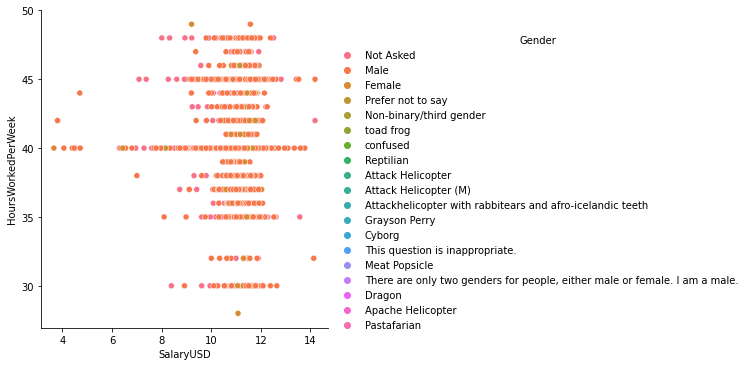

In [10]:
mean_salary_by_HoursWorkedPerWeek = df[['SalaryUSD','HoursWorkedPerWeek']].groupby(['HoursWorkedPerWeek']).mean().sort_values(by = 'HoursWorkedPerWeek',ascending = True)
std_salary_by_HoursWorkedPerWeek = df[['SalaryUSD','HoursWorkedPerWeek']].groupby(['HoursWorkedPerWeek']).std().sort_values(by = 'HoursWorkedPerWeek',ascending = True)
print(df.HoursWorkedPerWeek.mean())
print(df.HoursWorkedPerWeek.std())
sns.relplot(x=np.log(df["SalaryUSD"]), y="HoursWorkedPerWeek", data=df[(df.HoursWorkedPerWeek <50) & (df.HoursWorkedPerWeek >25)], hue="Gender")
plt.show()

## Transformers

In [11]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

def encode_feature(df,feature):
  df[feature] = df[feature].fillna("Unkown")
  ord_enc = OrdinalEncoder()
  return ord_enc.fit_transform(df[[feature]]).reshape((len(df[[feature]]),1))

def standard_scale(df,feature):
  res = df[[feature]].to_numpy().reshape((len(df[[feature]]),1))
  return (res - np.mean(res))/np.std(res)

cols = ["Education",
        "HoursWorkedPerWeek",
        'Certifications',
        'EducationIsComputerRelated']

transformer_Education = FunctionTransformer(lambda df: encode_feature(df,'Education'))
transformer_Certifications = FunctionTransformer(lambda df: encode_feature(df,'Certifications'))
transformer_EducationIsComputerRelated = FunctionTransformer(lambda df: encode_feature(df,'EducationIsComputerRelated'))
transformer_HoursWorkedPerWeek = FunctionTransformer(lambda df: standard_scale(df,'HoursWorkedPerWeek'))

transformer = make_column_transformer(
    (transformer_Education,['Education']),
    (transformer_HoursWorkedPerWeek,['HoursWorkedPerWeek']),
    (transformer_Certifications,['Certifications']),
    (transformer_EducationIsComputerRelated,['EducationIsComputerRelated']), 
    ('passthrough', cols)
)

pipe = make_pipeline(
    transformer
)



In [12]:
test = pipe.fit_transform(df)
print(test)

[[3.0 0.26130848179121874 1.0 ... 45 "Yes, and they're currently valid"
  'No']
 [4.0 -1.161251755231443 0.0 ... 35 'No, I never have' nan]
 [3.0 0.26130848179121874 2.0 ... 45 'Yes, but they expired' 'Yes']
 ...
 [1.0 -0.4499716367201121 1.0 ... 40 "Yes, and they're currently valid"
  'Yes']
 [1.0 -0.16545958931557977 2.0 ... 42 'Yes, but they expired' 'Yes']
 [1.0 -0.4499716367201121 0.0 ... 40 'No, I never have' 'Yes']]
